# Graduate Admission 2 

### Context
> This dataset is created for prediction of Graduate Admissions from an Indian perspective. 

### Content

>The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

    GRE Scores ( out of 340 )
    TOEFL Scores ( out of 120 )
    University Rating ( out of 5 )
    Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
    Undergraduate GPA ( out of 10 )
    Research Experience ( either 0 or 1 )
    Chance of Admit ( ranging from 0 to 1 )


### Acknowledgements

>This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
data=pd.read_csv("Admission_Predict.csv")

### Explotary Data Analysis

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [10]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [27]:
data=data.drop(columns=['Serial No.'],axis=1)

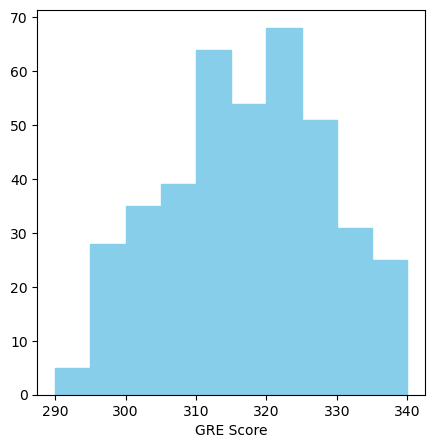

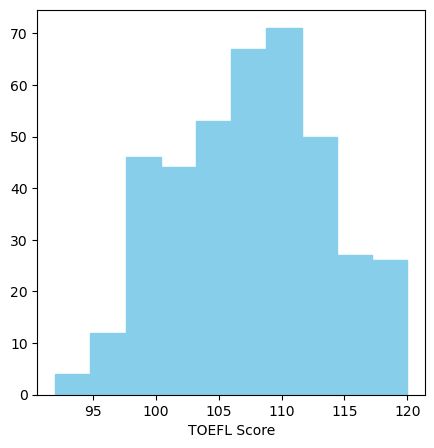

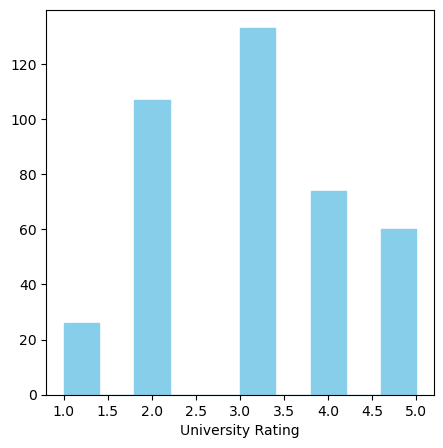

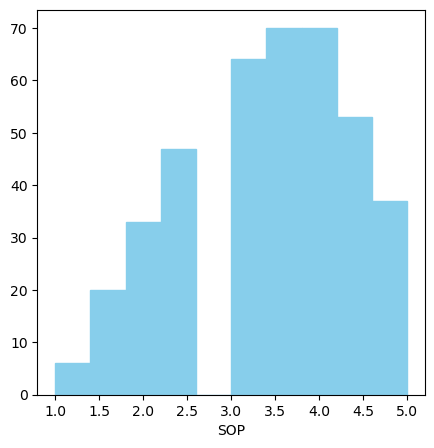

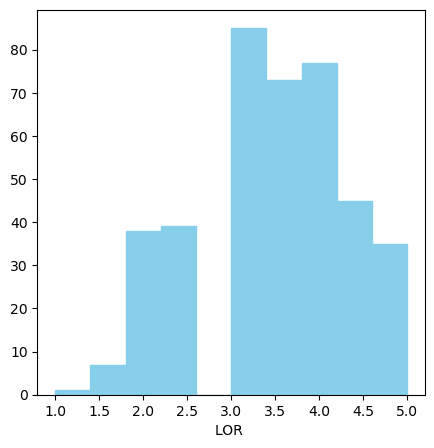

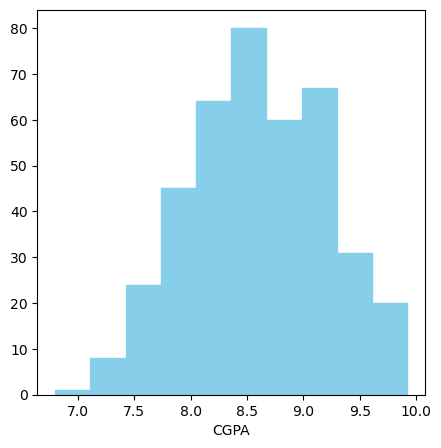

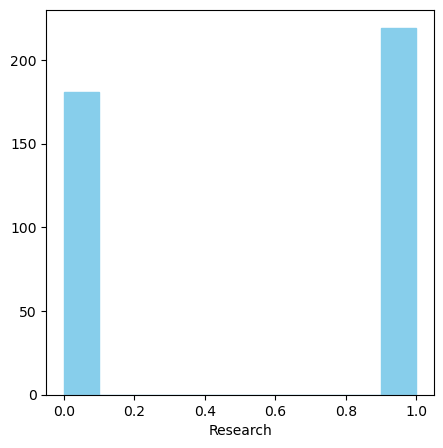

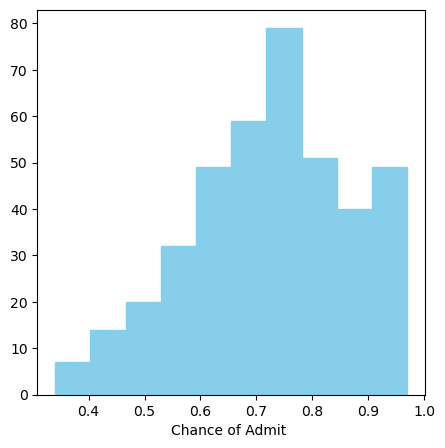

In [51]:

for label in data.keys():
    fig, ax = plt.subplots(figsize=(5,5))
    ax.hist(data[label],color = "skyblue", ec="skyblue")
    plt.xlabel(label)

In [104]:
### Data vsualization

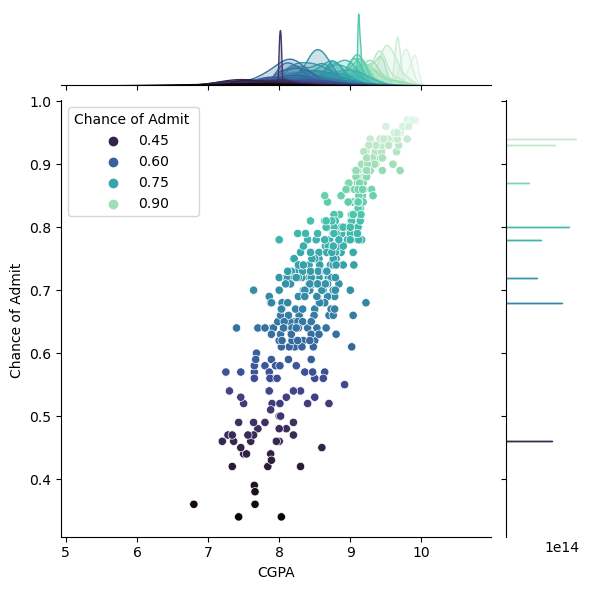

In [49]:
sns.jointplot(x=data['CGPA'],y=data['Chance of Admit '],hue=data["Chance of Admit "],palette='mako');

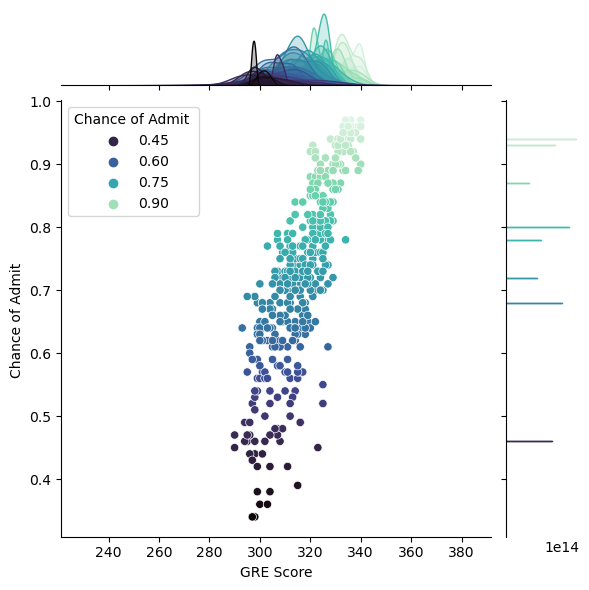

In [52]:
sns.jointplot(x=data['GRE Score'],y=data['Chance of Admit '],hue=data["Chance of Admit "],palette='mako');

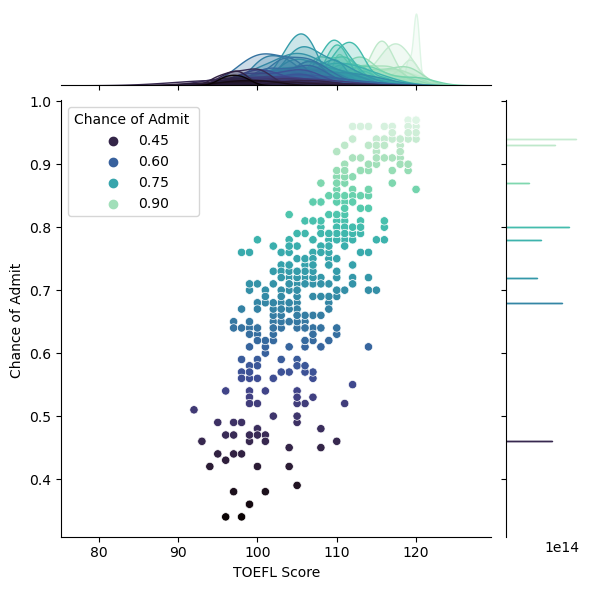

In [54]:
sns.jointplot(x=data['TOEFL Score'],y=data['Chance of Admit '],hue=data["Chance of Admit "],palette='mako');

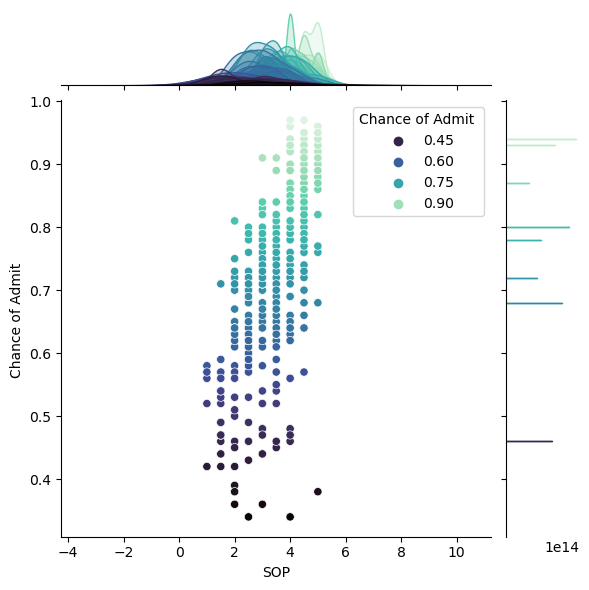

In [55]:
sns.jointplot(x=data['SO'],y=data['Chance of Admit '],hue=data["Chance of Admit "],palette='mako');

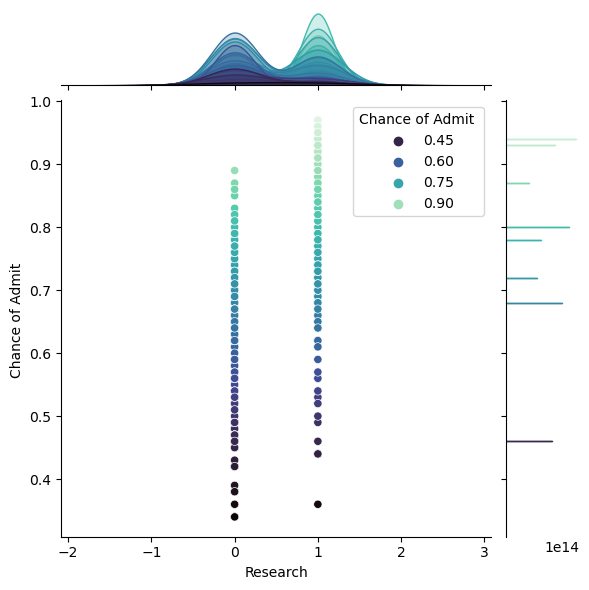

In [56]:
sns.jointplot(x=data['Research'],y=data['Chance of Admit '],hue=data["Chance of Admit "],palette='mako');

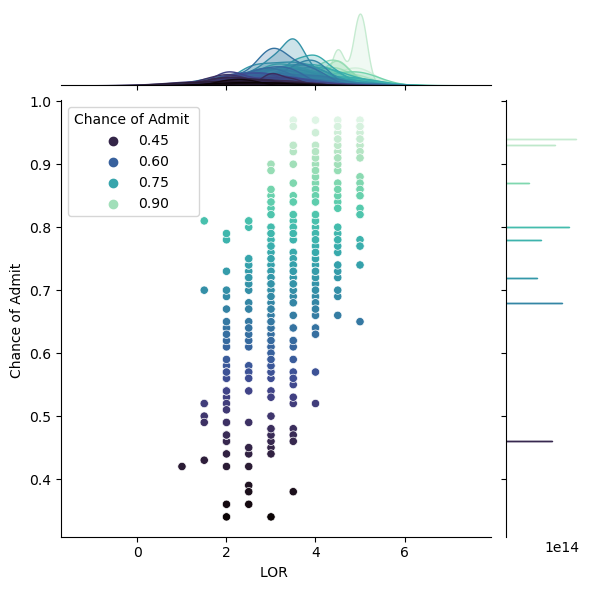

In [59]:
sns.jointplot(x=data['LOR '],y=data['Chance of Admit '],hue=data["Chance of Admit "],palette='mako');

In [63]:
y=data['Chance of Admit ']
x=data.drop(columns=['Chance of Admit '],axis=1)

### Training & Evaluation

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV,Lasso,LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)
model_ridge=RidgeCV(alphas=np.logspace(-6, 6, 13))
model_ridge.fit(x_train,y_train)
print("Score:",model_ridge.score(x_test,y_test))
print("Ridge Alpha:",model_ridge.alpha_)

Score: 0.793250983406373
Ridge Alpha: 1.0


In [75]:
model_lasso=Lasso(alpha=1)
model_lasso.fit(x_train,y_train)
print("Score:",model_lasso.score(x_test,y_test))

Score: 0.24266797974252752


In [77]:
model_lg=LinearRegression()
model_lg.fit(x_train,y_train)
print("Score Linear Regression:",model_lg.score(x_test,y_test))

Score Linear Regression: 0.7926301384417999


In [84]:
from sklearn.linear_model import BayesianRidge
model_br=BayesianRidge(verbose=True)
model_br.fit(x_train,y_train)
y_br_preds=model_br.predict(x_test)

Convergence after  3  iterations


In [85]:
print(f'''
model coefficient:{model_br.coef_}
model intercept:{model_br.intercept_}
model lambda:{model_br.lambda_}

''')


model coefficient:[ 0.00112641  0.00400839  0.00408547 -0.00026931  0.02430636  0.11042823
  0.03138391]
model intercept:-1.1255754389513688
model lambda:494.06171383081164




In [86]:
model.score(x_test,y_test)

0.793250983406373

In [99]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
y_train = [1 if each > 0.8 else 0 for each in y_train]
y_test = [1 if each > 0.8 else 0 for each in y_test]
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [100]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print('MSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

[[65  0]
 [ 7 28]]
Accuracy: 93.00%
MSE: 0.2645751311064591


### Features Importance

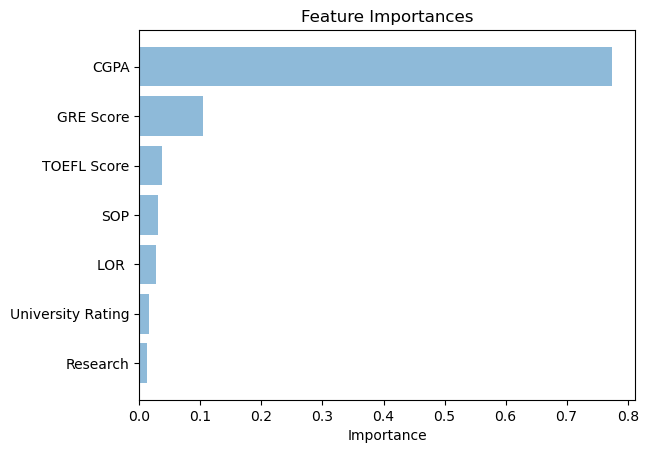

In [102]:
classifier = RandomForestRegressor()
classifier.fit(x,y)
feature_names = x.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = x.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()